In [132]:
import pandas as pd

In [133]:
df = pd.read_pickle("../data/clean/diagnoses.pkl")
df["ckd_stadium"] = df["ckd_stadium"].astype(float)
df_grp = df.groupby(["patient_id"]).agg(ckd_stadium = pd.NamedAgg("ckd_stadium", "max"),
                                        age = pd.NamedAgg("age_2022", "max"),
                                        bmi = pd.NamedAgg("bmi", "mean"),
                                        is_dia = pd.NamedAgg("is_dia_patient", "max"),
                                        is_ckd = pd.NamedAgg("is_ckd_patient", "max"),
                                        sex = pd.NamedAgg("sex", "max")).reset_index()

In [134]:
df_grp

,patient_id,ckd_stadium,age,bmi,is_dia,is_ckd,sex
0,85,NaN,71.2,21.300000,0,0,M
1,99,NaN,55.2,20.800000,0,0,F
2,104,NaN,65.9,33.500000,0,0,F
3,124,NaN,54.7,34.862500,0,0,M
4,126,NaN,48.6,NaN,0,0,F
...,...,...,...,...,...,...,...
15658,1298848,NaN,34.4,35.400000,1,0,M
15659,1305340,2.0,70.1,30.200000,1,1,M
15660,1340726,NaN,69.3,27.728571,1,0,M
15661,1349724,NaN,76.0,NaN,0,0,M


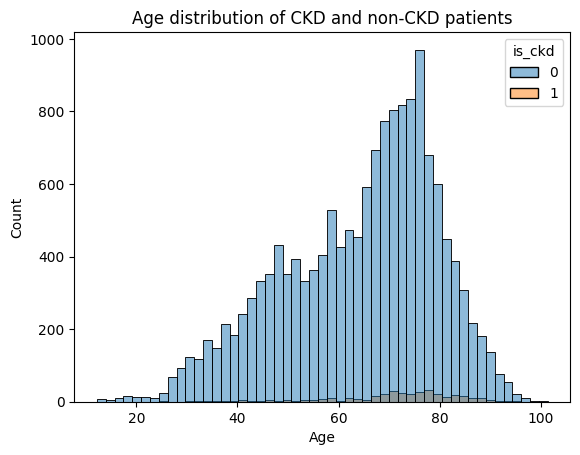

In [144]:
sns.histplot(data=df_grp, x = "age", hue = "is_ckd")
plt.title("Age distribution of CKD and non-CKD patients")
plt.xlabel("Age")
plt.show()

In [137]:
df_grp["age_bin"] = pd.qcut(df_grp["age"], q = 10)
df_agebin = df_grp.groupby("age_bin").agg(events = pd.NamedAgg("is_ckd", "sum"),
                                      cnt = pd.NamedAgg("patient_id", "count"),
                                      age_min = pd.NamedAgg("age", "min"),
                                      age_max = pd.NamedAgg("age", "max"))
df_agebin["age_mid"] = (df_agebin["age_max"] + df_agebin["age_max"]) / 2                
df_agebin["event_rate"] = df_agebin["events"] / df_agebin["cnt"]
df_agebin["events_covered_perc"] = df_agebin["events"] / df_agebin["events"].sum() * 100
df_agebin["events_covered_perc_cum"] = df_agebin["events_covered_perc"].cumsum() * 100
df_agebin = df_agebin.reset_index()

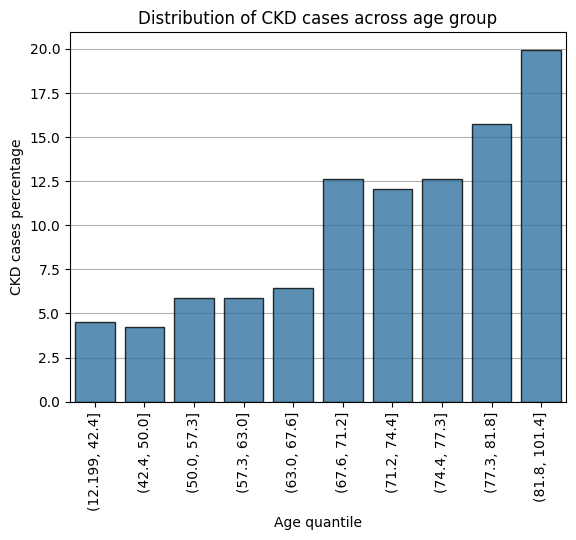

In [138]:
sns.barplot(data = df_agebin, 
            x = "age_bin", 
            y = "events_covered_perc", 
            color = "tab:blue", 
            alpha = 0.8,
            edgecolor = "black")
plt.ylabel("CKD cases percentage")
plt.xlabel("Age quantile")
plt.xticks(rotation=90)
plt.title("Distribution of CKD cases across age group")
plt.gca().set_axisbelow(True)
plt.grid(axis = "y")
plt.show()

In [139]:
df_grp["bmi_bin"] = pd.qcut(df_grp["bmi"], q = 10)
df_bmibin = df_grp.groupby("bmi_bin").agg(events = pd.NamedAgg("is_ckd", "sum"),
                                      cnt = pd.NamedAgg("patient_id", "count"),
                                      bmi_min = pd.NamedAgg("bmi", "min"),
                                      bmi_max = pd.NamedAgg("bmi", "max"),
                                      is_dia = pd.NamedAgg("bmi", "mean"))
df_bmibin["bmi_mid"] = (df_bmibin["bmi_max"] + df_bmibin["bmi_max"]) / 2                
df_bmibin["event_rate"] = df_bmibin["events"] / df_bmibin["cnt"]
df_bmibin["events_covered_perc"] = df_bmibin["events"] / df_bmibin["events"].sum() * 100
df_bmibin["events_covered_perc_cum"] = df_bmibin["events_covered_perc"].cumsum()
df_bmibin = df_bmibin.reset_index()

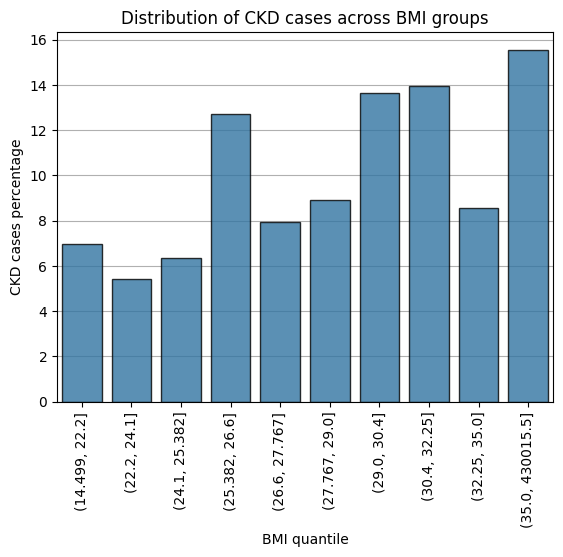

In [140]:
sns.barplot(data = df_bmibin, 
            x = "bmi_bin", 
            y = "events_covered_perc", 
            color = "tab:blue", 
            alpha = 0.8,
            edgecolor = "black")
plt.ylabel("CKD cases percentage")
plt.xlabel("BMI quantile")
plt.xticks(rotation=90)
plt.title("Distribution of CKD cases across BMI groups")
plt.gca().set_axisbelow(True)
plt.grid(axis = "y")
plt.show()

In [141]:
df_dia = df_grp.groupby("is_dia").agg(events = pd.NamedAgg("is_ckd", "sum"),
                                      cnt = pd.NamedAgg("patient_id", "count"))           
df_dia["event_rate_perc"] = df_dia["events"] / df_dia["cnt"] * 100
df_dia = df_dia.reset_index()
df_dia

,is_dia,events,cnt,event_rate_perc
0,0,193,11438,1.687358
1,1,173,4225,4.094675


In [142]:
df_sex = df_grp.groupby("sex").agg(events = pd.NamedAgg("is_ckd", "sum"),
                                      cnt = pd.NamedAgg("patient_id", "count"))           
df_sex["event_rate"] = df_sex["events"] / df_sex["cnt"]
df_sex = df_sex.reset_index()
df_sex

,sex,events,cnt,event_rate
0,F,139,7241,0.019196
1,M,217,8316,0.026094
